In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, average_precision_score, 
                             confusion_matrix, ConfusionMatrixDisplay)

In [2]:
# Load in titanic dataset 

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Use Pclass, Sex, Age, SibSp, Parch to predict Survived

# fill in null values in age 
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Dummy code sex
df['Sex_encoded'] = np.where(df['Sex'] == 'female', 1, 0)

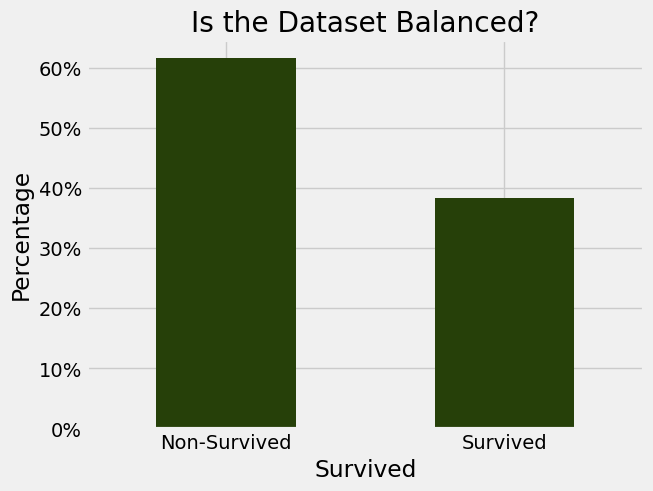

In [11]:
# Plot target variable 

with plt.style.context('fivethirtyeight'):
    ax = df['Survived'].value_counts(normalize=True).mul(100).plot(kind='bar', color='#264009')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    plt.xticks([0, 1], ['Non-Survived', 'Survived'], rotation=0)
    plt.ylabel('Percentage')
    plt.title('Is the Dataset Balanced?')
    plt.show()

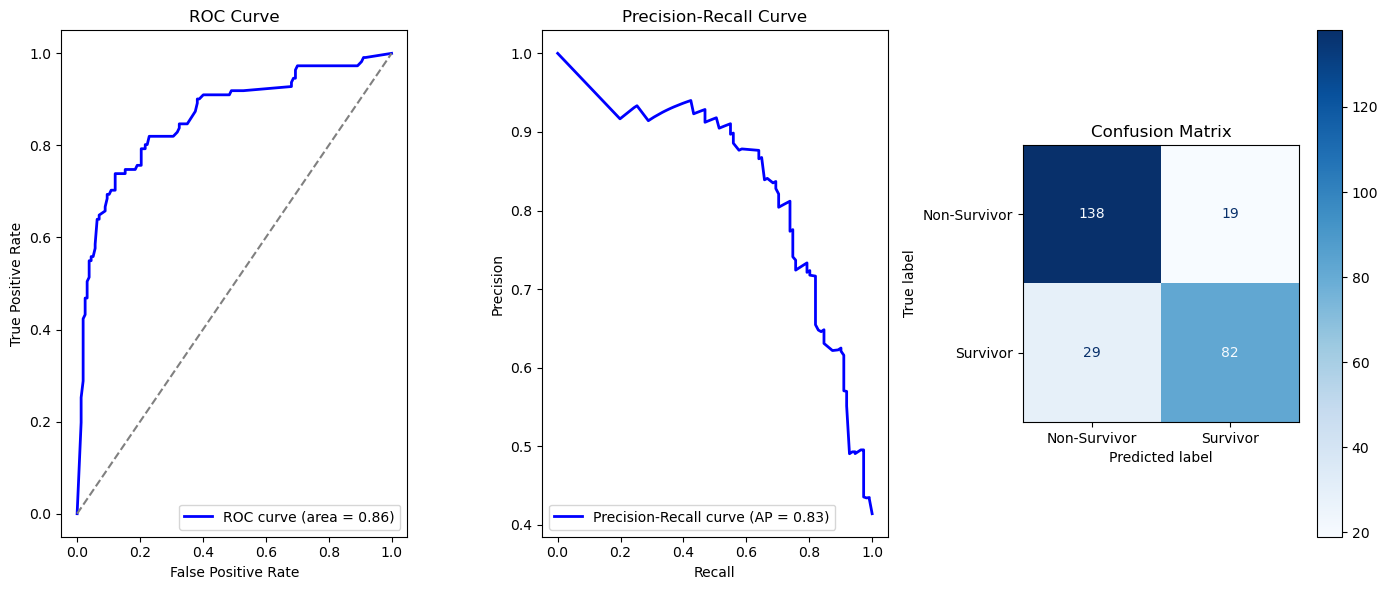

In [5]:
# Split into X and y 
X = df[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot ROC curve and Precision-Recall curve
plt.figure(figsize=(14, 6))

# Subplot for ROC curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Subplot for Precision-Recall curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Subplot for Confusion Matrix
plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Survivor', 'Survivor'])
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

Since this dataset is slightly imbalanced, a ROC plot returns an overly optimistic result. In this case, I would use a Precision-Recall Plot. This model had more false negatives than false positive because there are much more examples of the negative class.  To further improve this model, I would want to consider weighting the positive class more or perform upsampling/downsampling.  